Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [1]:
data_path = '~/Documents/DS/Data/kic/'

In [22]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt


In [205]:
data1 = pd.read_csv(data_path + 'exoTrain.csv')
data2 = pd.read_csv(data_path + 'exoTest.csv')

In [206]:
data1.shape, validation.shape, data2.shape

((5087, 3198), (509, 1599), (570, 3198))

In [207]:
features = data1.drop(columns='LABEL').columns
target = 'LABEL'


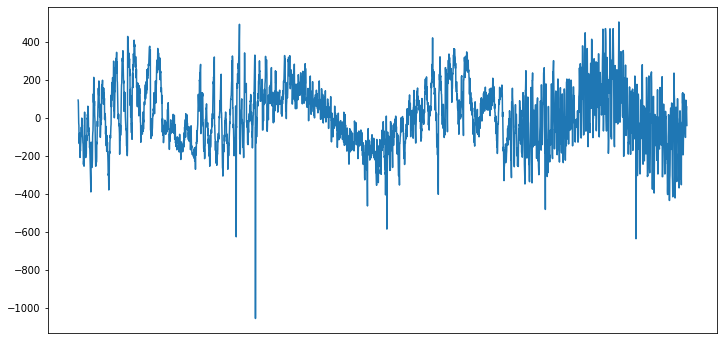

In [208]:
plt.figure(figsize=(12,6))
plt.xticks([])
plt.plot(data1[features].iloc[0])

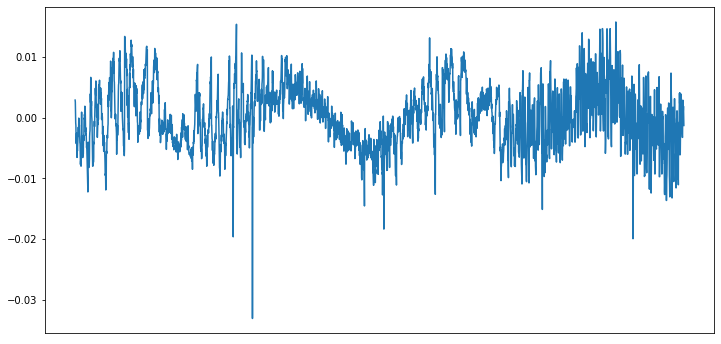

In [209]:
plt.figure(figsize=(12,6))
plt.xticks([])
plt.plot(data1[features].div(data1[features].sum(axis=1), axis=0).iloc[0])

In [210]:
def ft(x):
    y = sp.fft(x, n= x.size)
    return np.abs(y)
    
def spectrum_transform(X):
    X = X.copy()
    X = X.div(X.sum(axis=1), axis=0)
    X = X.apply(ft, axis=1)
    X = pd.DataFrame.from_records(X.iloc[[x for x in range(len(X))]])
    half = len(X.columns) // 2
    X = X.loc[:,half:]
    return X

train_transformed = spectrum_transform(data1[features])
test_transformed = spectrum_transform(data2[features])

In [211]:
train_transformed.shape, test_transformed.shape

((5087, 1599), (570, 1599))

In [212]:
train, validation = tts(train_transformed, random_state=42, test_size=0.1)

In [227]:
nav = train.index
nav2 = validation.index
nav3 = data2.index
y_train = data1.loc[nav, target]
y_val = data1.loc[nav2, target]
y_test = data2[target]

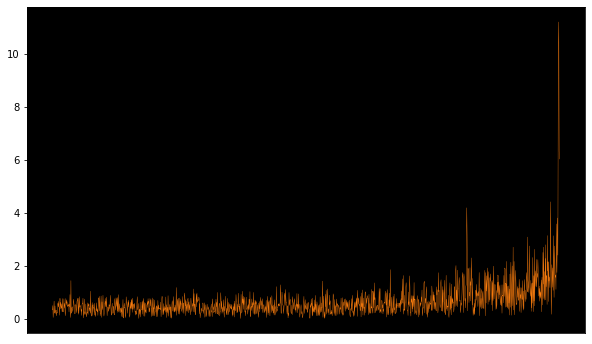

In [214]:
plt.figure(figsize=(10,6), facecolor='white')
plt.axes(facecolor='black')
plt.xticks([])
plt.plot(train.iloc[0], color='C1',linewidth=0.35)

In [215]:
import sklearn.pipeline as pipe
from imblearn.over_sampling import SMOTE

In [219]:
sampling = SMOTE(sampling_strategy='minority', random_state=42, )
X, y = sampling.fit_resample(train, y_train)

In [220]:
model_rf = rf(n_estimators=100, random_state=42, n_jobs=-1, max_depth=7)

In [221]:
model_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [119]:
X_val.shape

(509, 255)

In [231]:
y_pred = model_rf.predict(validation)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       503
           2       0.00      0.00      0.00         6

    accuracy                           0.99       509
   macro avg       0.49      0.50      0.50       509
weighted avg       0.98      0.99      0.98       509



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [232]:
y_pred_t = model_rf.predict(test_transformed)
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.50      0.40      0.44         5

    accuracy                           0.99       570
   macro avg       0.75      0.70      0.72       570
weighted avg       0.99      0.99      0.99       570



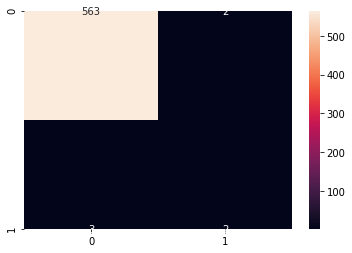

In [238]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm2 = confusion_matrix(y_test, y_pred_t)
sns.heatmap(cm2, annot=True, fmt='d')
